# Welcome to pyLIMA tutorial! #

Let's simulate, and fit back :), some events.

Do not forget, if not made already. To obtain working link to the documentation, you need to :

make html

in the doc directory.

# Alpha version, probably gonna change #

In [1]:
## First import the required libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os, sys


lib_path = os.path.abspath(os.path.join('../'))
sys.path.append(lib_path)

from pyLIMA import microlsimulator

Create your event. This function create an event class, more details here [pyLIMA documentation](file/../../doc/build/html/pyLIMA.event.html)

In [2]:
# Event : Name = A spectacular double source point lens', RA = 270, DEC = -30

my_own_creation = microlsimulator.simulate_a_microlensing_event(name ='A spectacular double source point lens', 
                                                                ra=270, dec=-30)

Create some telescopes. This function create a telescope class, more details here [pyLIMA documentation](file/../../doc/build/html/pyLIMA.telescopes.html)
You need to create a telescope class for each filter with a different name. For example here, SAAO_I and SAAO_V.

We need to build telescopes before the model that we gonna simulate because models need informations about filters and how many telescopes did observe your simulation.

In [3]:
# Create some telescopes

# Name = Survey, location = 'Earth', altitude = 1000 m, longitude = -109.285399, latitude = -27.130814,filter = 'I',start_obs =2457465.500000,
# end_obs = 2457665.500000 sampling(hours) = 4, your_event, bad_weather_percentage = 10%, mmoon_windows_avoidance (degree)=30, 
# minimum_alt=30)
my_survey = microlsimulator.simulate_a_telescope('survey',  1000, -109.285399, -27.130, 'I', 2457365.500000,2457965.500000,
                                                 4, my_own_creation, location = 'Earth',
                                                 bad_weather_percentage=10.0 / 100, moon_windows_avoidance=30, 
                                                 minimum_alt=30)


# Name = 'SAAO_I', altitude = 400 m, longitude = 20.659279, latitude = -32.3959,filter = 'I',start_obs =2457585.500000,
# end_obs = 2457615.500000, sampling(hours) = 2,  your_event,bad_weather_percentage = 20%, moon_windows_avoidance (degree)=15, 
#minimum_alt=15)
my_own_telescope_1 = microlsimulator.simulate_a_telescope('SAAO_I', 400, 20.659279, -32.3959, 'I', 2457585.5, 2457615.5, 
                                                          2,  my_own_creation, location = 'Earth', 
                                                          bad_weather_percentage=20.0 / 100, 
                                                          moon_windows_avoidance=15, minimum_alt=15)
# Name = 'SAAO_V', altitude = 400 m, longitude = 20.659279, latitude = -32.3959,filter = 'V',start_obs =2457689,
# end_obs = 2457750, sampling(hours) = 12, your_event, bad_weather_percentage = 20%, moon_windows_avoidance (degree)=20, 
# minimum_alt=15)
my_own_telescope_2 = microlsimulator.simulate_a_telescope('SAAO_V', 400, 20.659279, -32.3959, 'V', 2457585.5, 2457615.5, 
                                                          12,  my_own_creation, location = 'Earth',
                                                          bad_weather_percentage=20.0 / 100, 
                                                          moon_windows_avoidance=20, minimum_alt=15)

# Add them to your event
my_own_creation.telescopes.append(my_survey)
my_own_creation.telescopes.append(my_own_telescope_1)
my_own_creation.telescopes.append(my_own_telescope_2)


OK now we can choose the model we would like to simulate, here let's have a double source point lens one (DSPL). More details on models can be seen here [pyLIMA documentation](file/../../doc/build/html/pyLIMA.microlmodels.html)

More details on parameters generation can be found here [pyLIMA documentation](file/../../doc/build/html/pyLIMA.microlsimulator.html)

In [4]:
# What model you want? Let's have DSPL!
my_own_model = microlsimulator.simulate_a_microlensing_model(my_own_creation, model='DSPL', parallax=['None', 0.0],
                                             xallarap=['None', 0.0],
                                             orbital_motion=['None', 0.0], source_spots='None')

# Find some model parameters. If you want specific parameters, you need to respet pyLIMA convention when you create your 
# parameters. For the DSPL example, my_own_parameters = [to, uo, delta_to, delta_uo, tE].
my_own_parameters = microlsimulator.simulate_microlensing_model_parameters(my_own_model)

# Which source magnitude? Which blending? 
# Same here, you can create your own flux parameters with the convention
# [ [magnitude_source_i, blending ratio_i]] for i in telescopes. In our case it looks : 
# [ [magnitude_source_survey, blending ratio_survey], [ magnitude_source_SAAO_I, blending ratio_SAAO_I],  
# [magnitude_source_SAAO_V, blending ratio_SAAO_V]], i.e [[18.5,0.3],[19.5,1.2],[20.2,1.6]] (example).

my_own_flux_parameters = microlsimulator.simulate_fluxes_parameters(my_own_creation.telescopes)
my_own_parameters += my_own_flux_parameters


Now we need to transform these parameters into a parameter class object (this is a "technical" part but the interested reader can found the function here  [pyLIMA documentation](file/../../doc/build/html/pyLIMA.microlmodels.html))

In [5]:
# Transform into pyLIMA standards
pyLIMA_parameters = my_own_model.compute_pyLIMA_parameters(my_own_parameters)

Ok now we have the model we want to simulate, we then need to updates our telescopes observations!

In [6]:
# update the telescopes lightcurve in your event :
microlsimulator.simulate_lightcurve_flux(my_own_model, pyLIMA_parameters,  red_noise_apply='Yes')

That's it, our simulation is done! Let see how it looks :

<IPython.core.display.Javascript object>


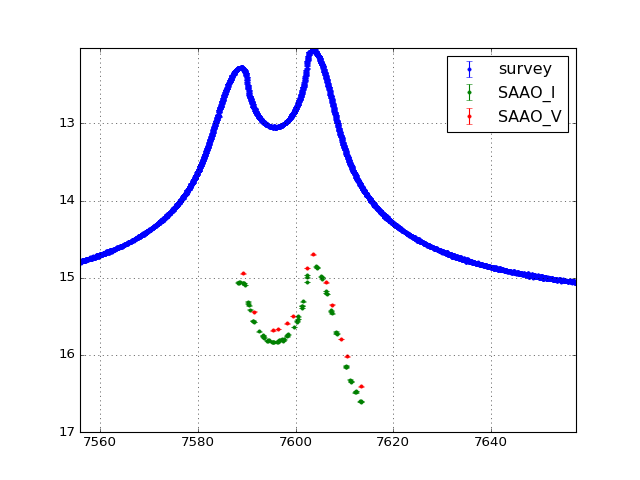

to  =  2457597.36127  :  time of minimum impact parameter for source 1
uo  =  0.222652695571  :  minimum impact parameter for source 1
tE  =  71.2622656333  :  difference of time of minimum impact parameter between the two sources
rho  =  0.0238850347277  :  difference of minimum impact parameters between the two sources
logs  =  -0.229124069988  :  angular Einstein radius crossing time
logq  =  -3.39004056594  :  flux ratio in I between source 1 and source 2
alpha  =  2.58319461165  :  flux ratio in V between source 1 and source 2
fs_survey  =  43497.0737421  :  source flux of source 1 for telescope survey
g_survey  =  0.574203859505  :  blending ratio of source 1 for telescope survey
fs_SAAO_I  =  3418.84522735  :  source flux of source 1 for telescope SAAO_I
g_SAAO_I  =  0.347678944362  :  blending ratio of source 1 for telescope SAAO_I
fs_SAAO_V  =  3782.04698651  :  source flux of source 1 for telescope SAAO_V
g_SAAO_V  =  0.904734247734  :  blending ratio of source 1 for telescop

In [7]:
#### Plot it!

for telescope in my_own_creation.telescopes:
    plt.errorbar(telescope.lightcurve_magnitude[:, 0]-2450000, telescope.lightcurve_magnitude[:, 1],
                 yerr=telescope.lightcurve_magnitude[:, 2], fmt='.',label=telescope.name)

    
# A list of commentary to explain parameters. Of couse, this is valable only for the DSPL models.
parameter_commentary = ['time of minimum impact parameter for source 1',
                        'minimum impact parameter for source 1',
                        'difference of time of minimum impact parameter between the two sources',
                        'difference of minimum impact parameters between the two sources',
                        'angular Einstein radius crossing time',
                        'flux ratio in I between source 1 and source 2',
                        'flux ratio in V between source 1 and source 2',
                        'source flux of source 1 for telescope survey',
                        'blending ratio of source 1 for telescope survey',
                        'source flux of source 1 for telescope SAAO_I',
                        'blending ratio of source 1 for telescope SAAO_I',
                        'source flux of source 1 for telescope SAAO_V',
                        'blending ratio of source 1 for telescope SAAO_V',
                        ]
for key in my_own_model.model_dictionnary.keys():
    
    indice = my_own_model.model_dictionnary[key]
    
    print key, ' = ', my_own_parameters[indice], ' : ', parameter_commentary[indice] 

plt.gca().invert_yaxis()
plt.legend(numpoints=1)
plt.grid(True)
plt.show()

Let's try to fit this now! You can go back to pyLIMA_example_1 for a more complete explanation if needed.

Look in particular your DSPL fit parameters versus the model above.

In [ ]:
from pyLIMA import microlmodels

model_1 = microlmodels.create_model('PSPL', my_own_creation)
my_own_creation.fit(model_1,'DE')

model_2 = microlmodels.create_model('DSPL', my_own_creation)
my_own_creation.fit(model_2,'DE')

my_own_creation.fits[0].produce_outputs()
my_own_creation.fits[1].produce_outputs()

print my_own_creation.fits[0].model.model_type,'Chi2_LM :',my_own_creation.fits[0].outputs.fit_parameters.chichi
print my_own_creation.fits[1].model.model_type,'Chi2_LM :',my_own_creation.fits[1].outputs.fit_parameters.chichi

plt.show()